# Dados Campus Sertãozinho


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
dados = pd.read_csv('Relatorio_novo_1.CSV')

In [3]:
dados = dados.loc[dados['Modalidade'] != "FIC"]

In [4]:
dados['Situação no Curso'].value_counts()

Evasão                             2059
Concluído                          1728
Matriculado                        1696
Cancelado                           906
Formado                             813
Transferido Externo                 127
Matrícula Vínculo Institucional      62
Cancelamento Compulsório             31
Trancado Voluntariamente             31
Transferido Interno                  14
Trancado                              3
Name: Situação no Curso, dtype: int64

In [5]:
dados['Modalidade'].value_counts()

Técnico Integrado                   1569
Licenciatura                        1413
Tecnologia                          1251
Técnico Concomitante/Subsequente    1061
Bacharelado                          875
Técnico Integrado EJA                821
Mestrado                             383
Técnico Subsequente                   97
Name: Modalidade, dtype: int64

# Filtros

In [6]:
dados = dados.drop(["Renda Per Capita"],axis = 1)

In [7]:
dados = dados.drop(["Matrícula"],axis = 1)

In [8]:
dados

,#,Ano de Ingresso,Deficiência,Descrição do Curso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Modalidade,Nacionalidade,Sexo,Situação no Curso,Tipo de Escola de Origem
0,1,2019,Sem Necessidade Especial,TÉCNICO EM ELETRÔNICA,SP,Parda,Ampla Concorrência (Geral),Técnico Concomitante/Subsequente,Brasileira,F,Evasão,Pública
1,2,2008,Sem Necessidade Especial,TECNOLOGIA EM FABRICAÇÃO MECÂNICA,SP,Não declarado,Ampla Concorrência (Vestibular),Tecnologia,Brasileira,M,Evasão,Pública
2,3,2015,Sem Necessidade Especial,TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO,SP,Parda,Escola Pública + PPI,Técnico Integrado,Brasileira,M,Concluído,Pública
3,4,2016,Sem Necessidade Especial,LICENCIATURA EM QUÍMICA,SP,Branca,Seleção Geral Graduação (SiSU) (Inativa),Licenciatura,Brasileira,M,Cancelado,Pública
4,5,2023,Sem Necessidade Especial,LICENCIATURA EM QUÍMICA,SP,Branca,Ampla Concorrência SISU,Licenciatura,Brasileira,M,Cancelado,Privada
...,...,...,...,...,...,...,...,...,...,...,...,...
11918,11919,2022,Sem Necessidade Especial,LICENCIATURA EM LETRAS NaN HABILITAÇÃO EM PORT...,SP,Parda,Ampla Concorrência (Geral),Licenciatura,Brasileira,M,Evasão,Pública
11921,11922,2011,Sem Necessidade Especial,OPERADOR DE MÁQUINA DE SOLDA ELÉTRICA,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Subsequente,Brasileira,F,Matriculado,Pública
11922,11923,2011,Sem Necessidade Especial,TÉCNICO EM ADMINISTRAÇÃO INTEGRADO AO ENSINO M...,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Integrado EJA,Brasileira,F,Concluído,Pública
11928,11929,2009,Sem Necessidade Especial,TÉCNICO EM ADMINISTRAÇÃO INTEGRADO AO ENSINO M...,SP,Não declarado,Ampla Concorrência (Vestibular),Técnico Integrado EJA,Brasileira,F,Concluído,Pública


# Número de alunos

In [9]:
pip install matplotlib

In [10]:
import matplotlib.pyplot as plt

In [11]:
dados['Ano de Ingresso'].value_counts()


2023    652
2022    588
2018    579
2019    553
2021    524
2017    521
2020    509
2016    452
2014    400
2011    398
2012    392
2008    388
2013    331
2015    324
2010    306
2009    302
2007    251
Name: Ano de Ingresso, dtype: int64

In [12]:
dados['Descrição do Curso'].value_counts()

TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO ENSINO MÉDIO                                  780
LICENCIATURA EM QUÍMICA                                                                    672
TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO                                               665
TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO NaN PROEJA                                   654
TECNOLOGIA EM GESTÃO DE RECURSOS HUMANOS                                                   588
BACHARELADO EM ENGENHARIA MECÂNICA                                                         562
TECNOLOGIA EM AUTOMAÇÃO INDUSTRIAL                                                         436
PROGRAMA ESPECIAL DE FORMAÇÃO DE DOCENTES PARA A EDUCAÇÃO BÁSICA                           398
MESTRADO PROFISSIONAL EM EDUCAÇÃO PROFISSIONAL E TECNOLÓGICA EM REDE NACIONAL (PROFEPT)    383
TÉCNICO EM ADMINISTRAÇÃO                                                                   360
TÉCNICO EM ELETRÔNICA                             

In [13]:
dados['Modalidade'].value_counts()

Técnico Integrado                   1569
Licenciatura                        1413
Tecnologia                          1251
Técnico Concomitante/Subsequente    1061
Bacharelado                          875
Técnico Integrado EJA                821
Mestrado                             383
Técnico Subsequente                   97
Name: Modalidade, dtype: int64

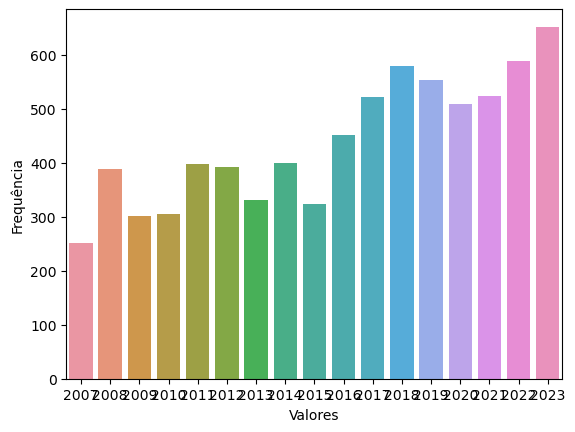

In [14]:
# Para começar a análise dos dados foi relevante enxergar o número de alunos em geral no campus Sertãozinho com o decorrer dos anos.
sns.countplot(x = dados['Ano de Ingresso'])
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 10

# Raça

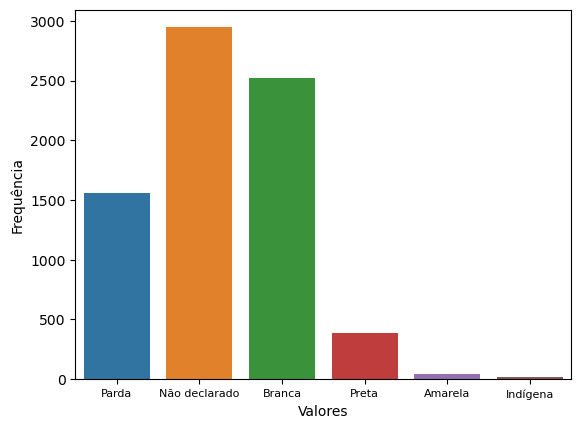

In [15]:
# A primeira informação buscada na análise foi relacionada com raça/etnia/cor, no primeiro gráfico
# é possível observar a quantidade de alunos de cada raça/etnia/cor e também os que não declararam no campus Sertãozinho. 
# Podemos perceber graficamente que o número de brancos é alto em comparação com o restante, assim com o de alunos que não declaram.
sns.countplot(x = dados['Etnia/Raça/Cor'])
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

<Axes: xlabel='Etnia/Raça/Cor', ylabel='Count'>

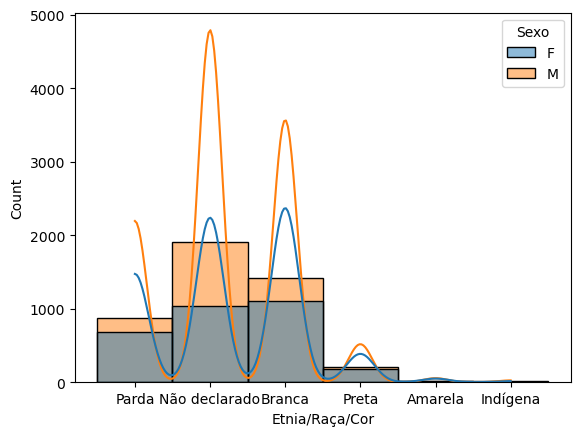

In [16]:
# No gráfico a seguir é analisado a diferença no número de alunos homens e mulheres e também relacionar com 
# questões raciais/étinicas. Pode-se perceber um grande número de alunos brancos e homens.
sns.histplot(data=dados, x="Etnia/Raça/Cor", hue='Sexo', kde=True)

In [17]:
dados['Etnia/Raça/Cor'].value_counts()

Não declarado    2946
Branca           2520
Parda            1557
Preta             385
Amarela            45
Indígena           17
Name: Etnia/Raça/Cor, dtype: int64

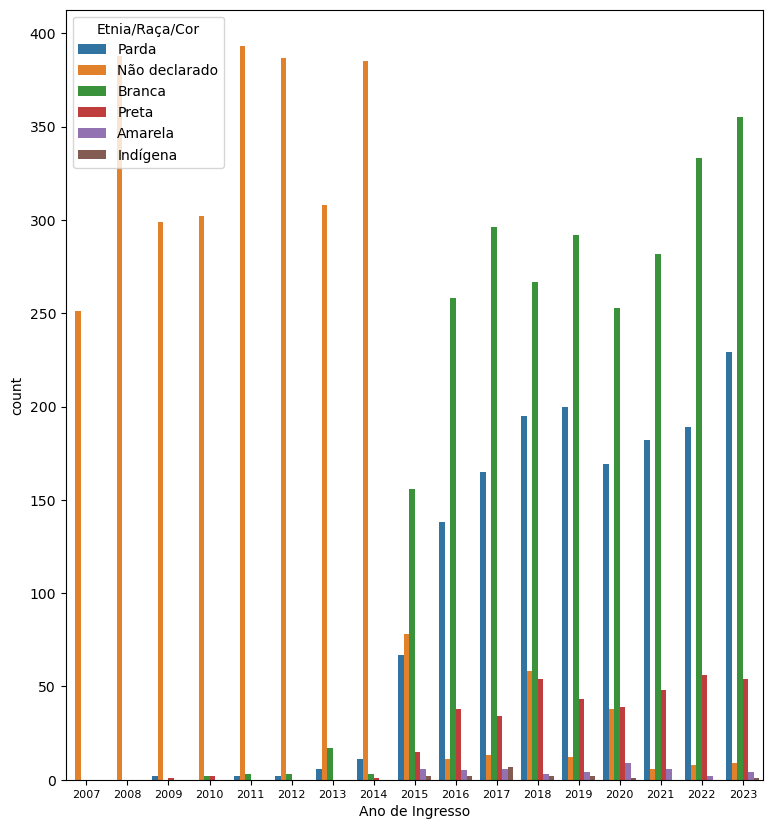

In [18]:
# O gráfico a seguir mostra a dimuição de não declarados após dois mil e catorze.
plt.figure(figsize= (9,10))
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 10
sns.countplot(data=dados, x='Ano de Ingresso', hue='Etnia/Raça/Cor')
plt.show()

# Tipo de escolaridade

<Axes: xlabel='Tipo de Escola de Origem', ylabel='count'>

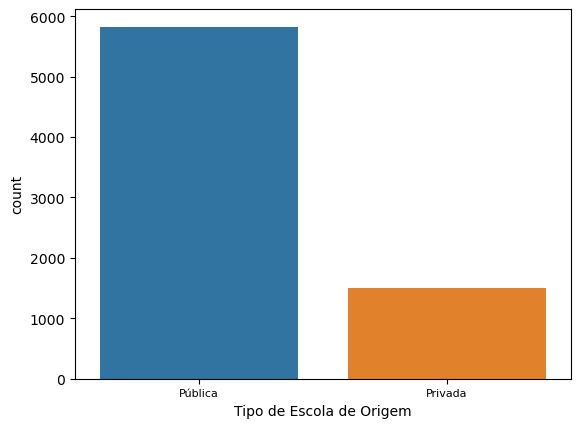

In [19]:
# Neste novo tópico será possivel analisar a escolaridade de origem dos alunos, sendo pública ou privada, uma informação 
# importante para os próximos passos do projeto. No gráfico a seguir existe uma diferença grande entre público e privado, com público sendo maior. 
sns.countplot(x = dados['Tipo de Escola de Origem'])

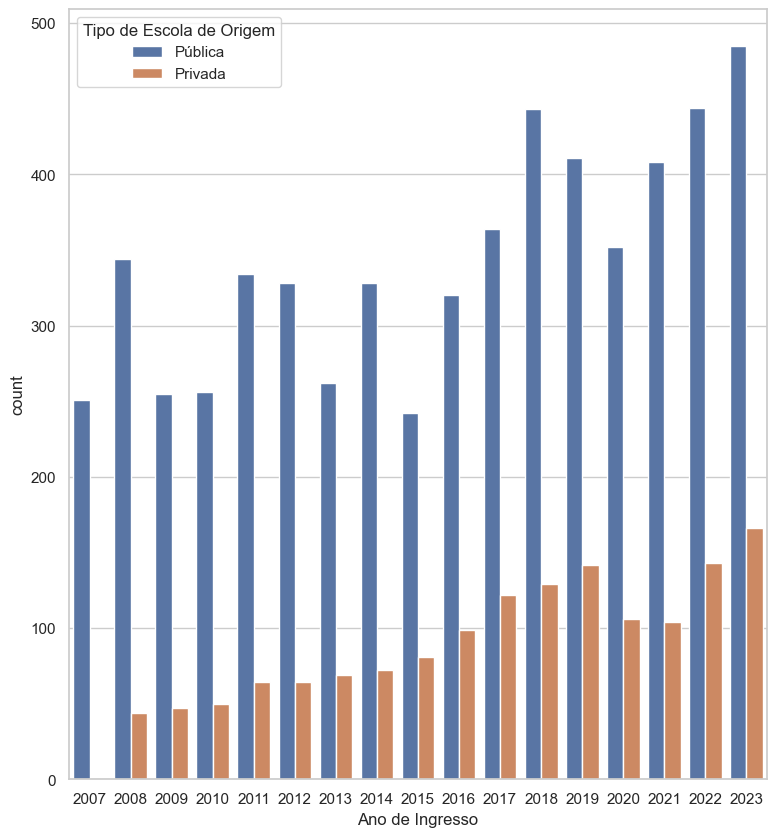

In [20]:
# No gráfico a seguir é possível ver o número de alunos e suas escolaridades de origem ao decorrer dos anos.(DADOS COM FILTRO DE DATA)
plt.figure(figsize= (9,10))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Ano de Ingresso', hue='Tipo de Escola de Origem')
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 10
plt.show()

In [21]:
dados_Pub = dados[dados['Tipo de Escola de Origem']=='Pública']
dados_Pri = dados[dados['Tipo de Escola de Origem']=='Privada']

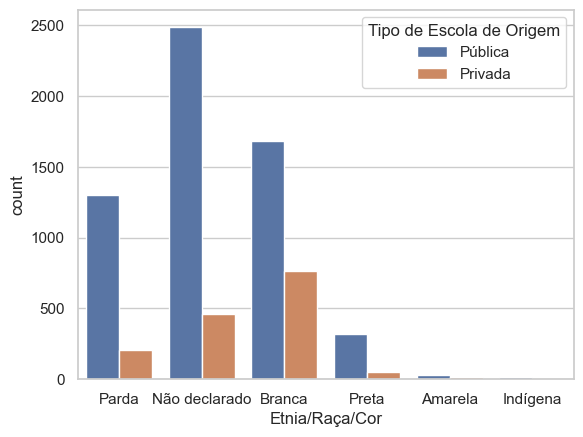

In [22]:
# Outra informação batante relevante para este estudo é mostrado no gráfico abaixo, onde existe uma disparidade alta entre 
# escolas de origem pública e privada.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Etnia/Raça/Cor', hue='Tipo de Escola de Origem')
plt.show()

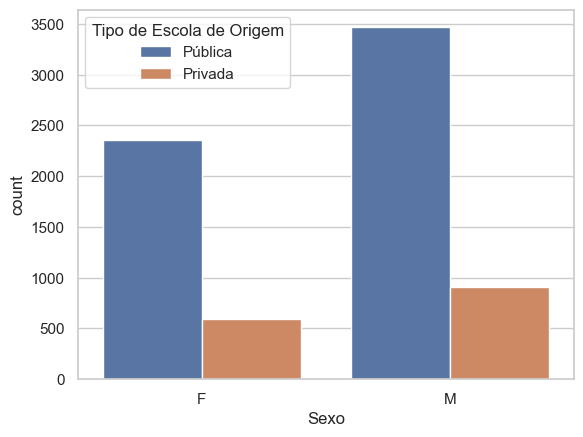

In [23]:
# Nas próximas conclusões que foram possíveis tirar a partir do gráfico abaixo, vemos a diferença entre
# o número de alunos de gênero masculino e feminino com relção a escola de origem, sendo bem perceptível um equilibrio.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Tipo de Escola de Origem')
plt.show()

# Gênero

<Axes: xlabel='Sexo', ylabel='count'>

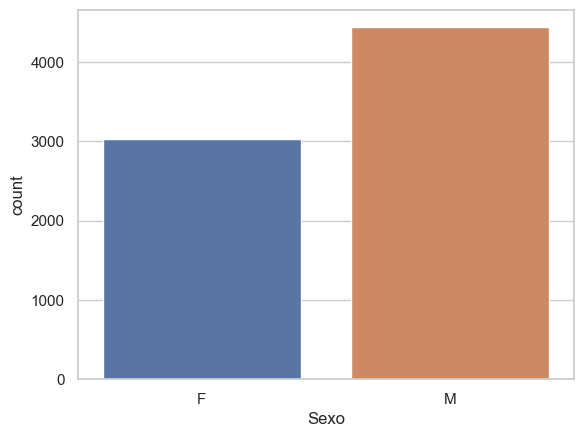

In [24]:
# Agora será feita uma ánalise sobre questões de gênero. Primeiro o gráfico a seguir mostra um equilíbrio entre o número geral de 
# homens e mulheres no campus. Um adendo importante é que os dados se resumem apenas a gênero masculino e feminino. 
sns.countplot(x = dados['Sexo'])

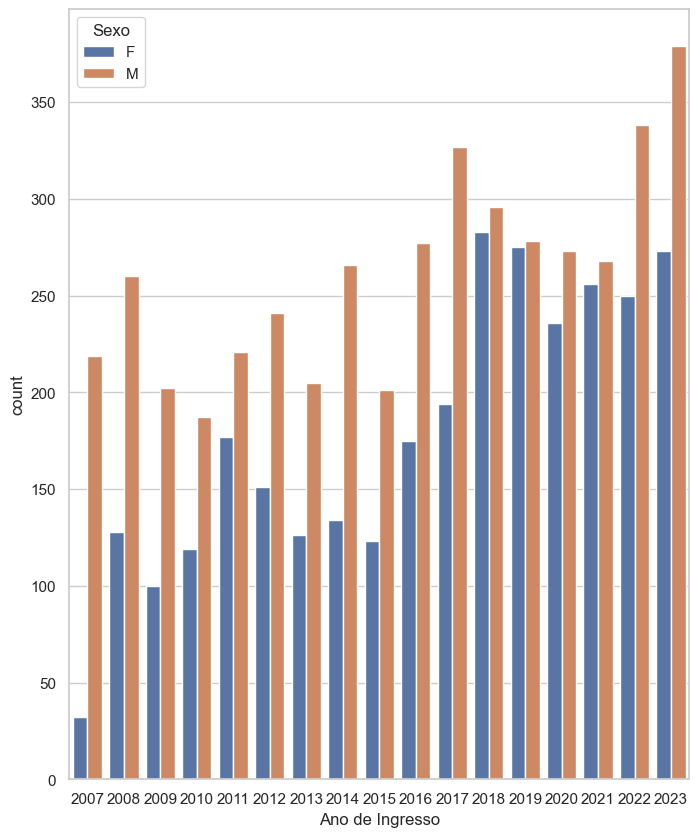

In [25]:
# O gráfico mostra o numero de alunos homens e mulheres no decorrer dos anos.
plt.figure(figsize= (8,10))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Ano de Ingresso', hue='Sexo')
plt.show()

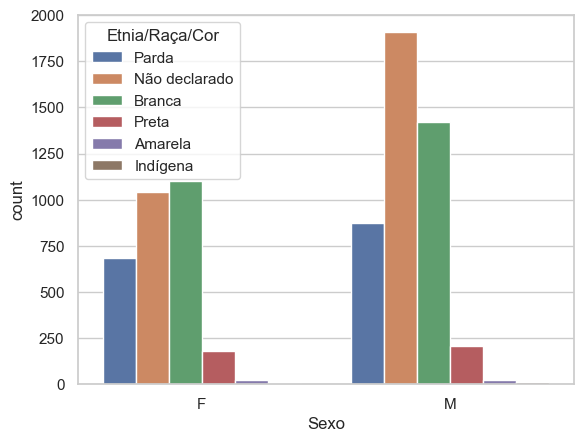

In [26]:
# Com relação a raça, o gráfico a seguir mostra, assim como analisado anteriormente, um grande número de alunos não declarados, brancos e seguidos 
# por alunos pardos com uma certa distância.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Etnia/Raça/Cor')
plt.show()

In [27]:
dados_M = dados[dados['Sexo']=='M']
dados_F = dados[dados['Sexo']=='F']

# Evasão

In [28]:
dados['Situação no Curso'].value_counts()

Evasão                             2059
Concluído                          1728
Matriculado                        1696
Cancelado                           906
Formado                             813
Transferido Externo                 127
Matrícula Vínculo Institucional      62
Cancelamento Compulsório             31
Trancado Voluntariamente             31
Transferido Interno                  14
Trancado                              3
Name: Situação no Curso, dtype: int64

In [29]:
dados_Evas = dados[dados['Situação no Curso']=='Evasão']

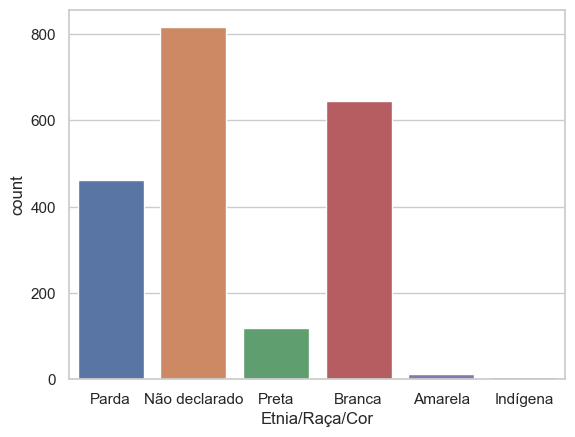

In [30]:
# O tópico de evasão é um dos mais importantes do projeto, nele pode-se observar algumas informações que serão muito importante para as 
# conclusões, no gráfico a seguir foi filtrado uma base de dados só com os alunos que evadiram em relação a raça/etnia/cor.
sns.countplot(x = dados_Evas['Etnia/Raça/Cor'])
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 15

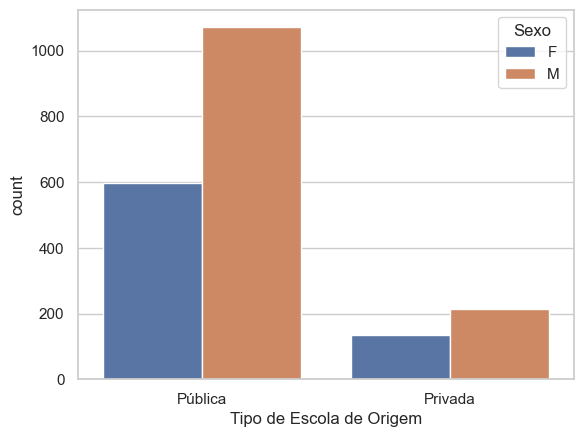

In [31]:
# Agora a análise de evasão é feita pela escola de origem e gênero, é possível perceber um alto número de alunos de origem de escola pública e
# homens que evadem mais. 
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Evas, x='Tipo de Escola de Origem', hue='Sexo')
plt.show()

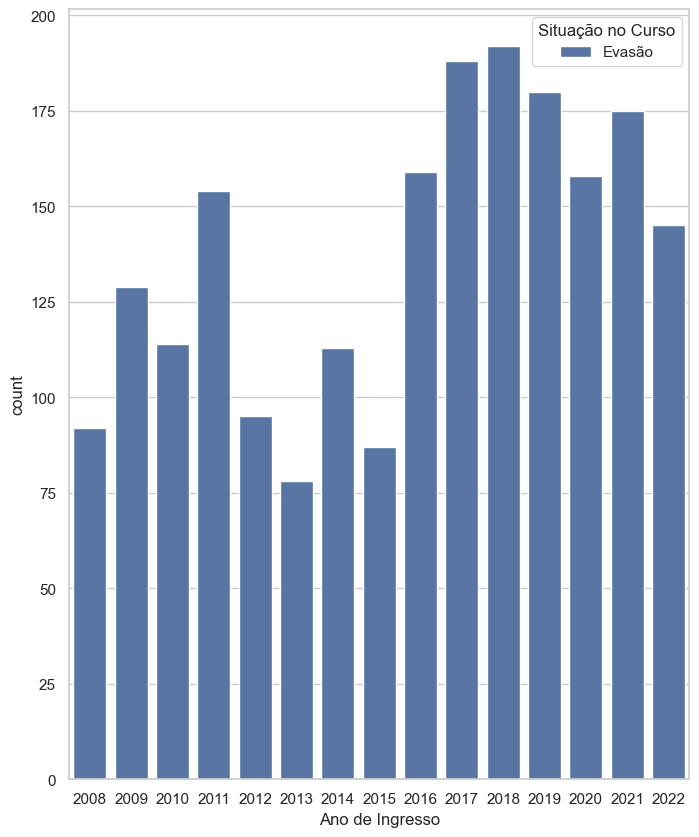

In [32]:
# Agora será analisado o número geral de evadidos, em todos os cursos e modalidades do campus, ao passar dos anos, 
# percebendo um ápice em dois mil e dezoito e uma queda nos anos de pandemia, 2020, 21 e 22. 
plt.figure(figsize= (8,10))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Evas, x='Ano de Ingresso', hue='Situação no Curso')
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 13
plt.show()

# Deficiência

In [33]:
dados_Def = dados[dados['Deficiência']=='PCD']

In [34]:
dados['Deficiência'].value_counts()

Sem Necessidade Especial    7420
PCD                           50
Name: Deficiência, dtype: int64

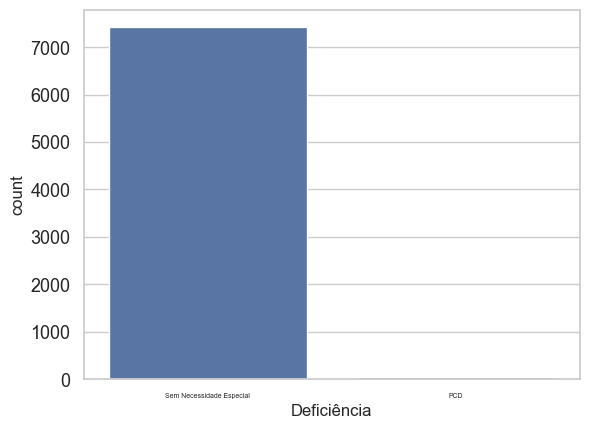

In [35]:
# O tópico de pessoas com deficiêcia (PCD) é importante para analisarmos o avanço do número geral desses alunos no campus 
# e muito importante para mostrar os avanços de acessibilidade do campus. No gráfico a seguir podemos ver a comparação de alunos PCD com alunos
# sem necessidades especiais.
sns.countplot(x = dados['Deficiência'])
plt.rcParams['xtick.labelsize'] = 11

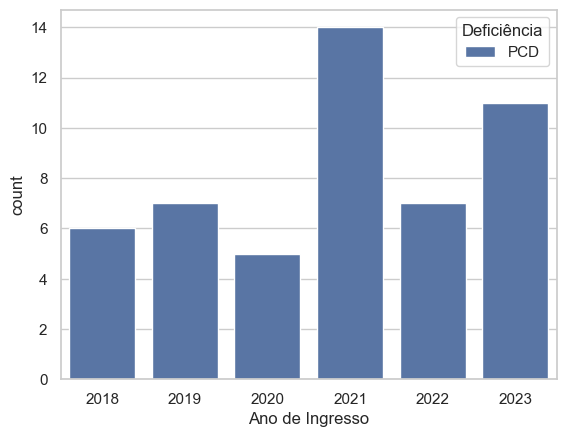

In [36]:
# A seguir será analisado a evolução no número de alunos PCD ao passar dos anos, mostrando um aumento substâncial nos anos de 
# dois mil e vinte um.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Def, x='Ano de Ingresso', hue='Deficiência')
plt.show()

In [37]:
dados_Def['Ano de Ingresso'].value_counts()

2021    14
2023    11
2022     7
2019     7
2018     6
2020     5
Name: Ano de Ingresso, dtype: int64

# Regras de Associação

In [38]:
!pip install apyori

In [39]:
import pandas as pd
from apyori import apriori


In [40]:
# Dados de alunos que evadiram em geral 
dados_2 = pd.read_csv('Dados_Atualizados.csv')

In [41]:
dados_2 =  dados_2.loc[dados_2['Situação no Curso']=='Evasão']

In [42]:
dados_2 = dados_2.drop(["Situação no Curso","Deficiência","Nacionalidade", "Renda Per Capita"],axis = 1)

In [43]:
dados_2 

,Descrição do Curso,Etnia/Raça/Cor,Forma de Ingresso,Modalidade,Sexo,Tipo de Escola de Origem,Ano de Ingresso,Município
0,TÉCNICO EM ELETRÔNICA,Parda,Ampla Concorrência (Geral),Técnico Concomitante/Subsequente,F,Pública,2019,SertãozinhoNaNSP
1,TECNOLOGIA EM FABRICAÇÃO MECÂNICA,Não declarado,Ampla Concorrência (Vestibular),Tecnologia,M,Pública,2008,SertãozinhoNaNSP
4,TECNOLOGIA EM AUTOMAÇÃO INDUSTRIAL,Não declarado,Seleção Geral Graduação (SiSU) (Inativa),Tecnologia,M,Pública,2014,Ribeirão PretoNaNSP
9,TECNOLOGIA EM FABRICAÇÃO MECÂNICA,Não declarado,Ampla Concorrência (Vestibular),Tecnologia,M,Pública,2010,Ribeirão PretoNaNSP
26,TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO ...,Não declarado,Ampla Concorrência (Vestibular),Técnico Integrado EJA,M,Pública,2010,SertãozinhoNaNSP
...,...,...,...,...,...,...,...,...
10219,TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO ...,Parda,Ampla Concorrência (Vestibular),Técnico Integrado EJA,M,Pública,2016,SertãozinhoNaNSP
10223,TECNOLOGIA EM GESTÃO DE RECURSOS HUMANOS,Não declarado,Seleção Geral Graduação (SiSU) (Inativa),Tecnologia,M,Pública,2011,Ribeirão PretoNaNSP
10231,LICENCIATURA EM QUÍMICA,Parda,"SiSU L5 (SGC L3) - Candidatos que, independent...",Licenciatura,M,Pública,2018,São Joaquim da BarraNaNSP
10260,BACHARELADO EM ENGENHARIA MECÂNICA,Não declarado,Seleção Geral Graduação (SiSU) (Inativa),Bacharelado,M,Pública,2014,SertãozinhoNaNSP


In [44]:
Lista = []
for i in range(len(dados_2)):
  #print(i)
  #print(base_mercado1.values[i, 0])
  Lista.append([str(dados_2.values[i, j]) for j in range(dados_2.shape[1])])

In [45]:
regras = apriori(Lista, min_support = 0.1, min_confidence = 0.2, min_lift = 2)
resultados = list(regras)
len(resultados)

26

In [46]:
resultados

[RelationRecord(items=frozenset({'Ampla Concorrência (Vestibular)', 'TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO NaN PROEJA'}), support=0.11116937598321971, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Ampla Concorrência (Vestibular)'}), items_add=frozenset({'TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO NaN PROEJA'}), confidence=0.2804232804232804, lift=2.2375196475614882), OrderedStatistic(items_base=frozenset({'TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO NaN PROEJA'}), items_add=frozenset({'Ampla Concorrência (Vestibular)'}), confidence=0.8870292887029289, lift=2.2375196475614887)]),
 RelationRecord(items=frozenset({'Ampla Concorrência (Vestibular)', 'Técnico Integrado EJA'}), support=0.15102254850550603, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Ampla Concorrência (Vestibular)'}), items_add=frozenset({'Técnico Integrado EJA'}), confidence=0.38095238095238093, lift=2.2989752863170585), OrderedStatistic(items_base=frozenset({'Técnico Integrado EJA

In [47]:
# Alunos que concluíram seus cursos 
dados_Concl = dados[dados['Situação no Curso']=='Concluído']

In [48]:
dados_Form = dados[dados['Situação no Curso']=='Formado']

In [52]:
dados_Form

,#,Ano de Ingresso,Deficiência,Descrição do Curso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Modalidade,Nacionalidade,Sexo,Situação no Curso,Tipo de Escola de Origem
21,22,2015,Sem Necessidade Especial,TECNOLOGIA EM GESTÃO DE RECURSOS HUMANOS,SP,Branca,Seleção Geral Graduação (SiSU) (Inativa),Tecnologia,Brasileira,F,Formado,Pública
43,44,2015,Sem Necessidade Especial,TECNOLOGIA EM GESTÃO DE RECURSOS HUMANOS,SP,Branca,Seleção Geral Graduação (SiSU) (Inativa),Tecnologia,Brasileira,M,Formado,Pública
89,90,2015,Sem Necessidade Especial,TECNOLOGIA EM GESTÃO DE RECURSOS HUMANOS,SP,Branca,Seleção Geral Graduação (SiSU) (Inativa),Tecnologia,Brasileira,F,Formado,Pública
115,116,2015,Sem Necessidade Especial,TECNOLOGIA EM GESTÃO DE RECURSOS HUMANOS,SP,Parda,Seleção Geral Graduação (SiSU) (Inativa),Tecnologia,Brasileira,M,Formado,Pública
134,135,2010,Sem Necessidade Especial,TECNOLOGIA EM AUTOMAÇÃO INDUSTRIAL,SP,Não declarado,Seleção Geral Graduação (SiSU) (Inativa),Tecnologia,Brasileira,M,Formado,Privada
...,...,...,...,...,...,...,...,...,...,...,...,...
11817,11818,2017,Sem Necessidade Especial,LICENCIATURA EM QUÍMICA,SP,Preta,SiSU L2 (SGC L2) NaN Candidatos autodeclarados...,Licenciatura,Brasileira,M,Formado,Pública
11850,11851,2012,Sem Necessidade Especial,TECNOLOGIA EM FABRICAÇÃO MECÂNICA,SP,Não declarado,Seleção Geral Graduação (SiSU) (Inativa),Tecnologia,Brasileira,M,Formado,Pública
11857,11858,2015,Sem Necessidade Especial,TECNOLOGIA EM AUTOMAÇÃO INDUSTRIAL,SP,Parda,Seleção Geral Graduação (SiSU) (Inativa),Tecnologia,Brasileira,M,Formado,Privada
11889,11890,2013,Sem Necessidade Especial,LICENCIATURA EM QUÍMICA,SP,Não declarado,Seleção Geral Graduação (SiSU) (Inativa),Licenciatura,Brasileira,F,Formado,Privada


In [50]:
dados_Concl = dados_Concl.drop(["Situação no Curso","Deficiência","Nacionalidade"],axis = 1)

In [57]:
dados_Form = dados_Form.drop(["Situação no Curso","Deficiência","Nacionalidade"],axis = 1)

In [58]:
Lista = []
for i in range(len(dados_Concl)):
  
  Lista.append([str(dados_Concl.values[i, j]) for j in range(dados_Concl.shape[1])])

In [59]:
regras = apriori(Lista, min_support = 0.2, min_confidence = 0.2, min_lift = 2)
resultados = list(regras)
len(resultados)

6

In [60]:
resultados

[RelationRecord(items=frozenset({'TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO ENSINO MÉDIO', 'Técnico Integrado'}), support=0.21296296296296297, ordered_statistics=[OrderedStatistic(items_base=frozenset({'TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO ENSINO MÉDIO'}), items_add=frozenset({'Técnico Integrado'}), confidence=1.0, lift=2.125461254612546), OrderedStatistic(items_base=frozenset({'Técnico Integrado'}), items_add=frozenset({'TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO ENSINO MÉDIO'}), confidence=0.4526445264452645, lift=2.125461254612546)]),
 RelationRecord(items=frozenset({'TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO', 'Técnico Integrado'}), support=0.2349537037037037, ordered_statistics=[OrderedStatistic(items_base=frozenset({'TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO'}), items_add=frozenset({'Técnico Integrado'}), confidence=1.0, lift=2.125461254612546), OrderedStatistic(items_base=frozenset({'Técnico Integrado'}), items_add=frozenset({'TÉCNICO EM QUÍMICA INTEGRADO AO E

In [61]:
Lista = []
for i in range(len(dados_Form)):
  
  Lista.append([str(dados_Form.values[i, j]) for j in range(dados_Form.shape[1])])

In [65]:
regras = apriori(Lista, min_support = 0.23, min_confidence = 0.2, min_lift = 2)
resultados = list(regras)
len(resultados)

4

In [66]:
resultados

[RelationRecord(items=frozenset({'Tecnologia', 'F', 'TECNOLOGIA EM GESTÃO DE RECURSOS HUMANOS'}), support=0.28044280442804426, ordered_statistics=[OrderedStatistic(items_base=frozenset({'TECNOLOGIA EM GESTÃO DE RECURSOS HUMANOS'}), items_add=frozenset({'F', 'Tecnologia'}), confidence=0.8475836431226764, lift=2.778570572011032), OrderedStatistic(items_base=frozenset({'Tecnologia', 'F'}), items_add=frozenset({'TECNOLOGIA EM GESTÃO DE RECURSOS HUMANOS'}), confidence=0.9193548387096774, lift=2.778570572011032)]),
 RelationRecord(items=frozenset({'Pública', 'Tecnologia', 'F', 'TECNOLOGIA EM GESTÃO DE RECURSOS HUMANOS'}), support=0.23493234932349324, ordered_statistics=[OrderedStatistic(items_base=frozenset({'TECNOLOGIA EM GESTÃO DE RECURSOS HUMANOS'}), items_add=frozenset({'F', 'Pública', 'Tecnologia'}), confidence=0.7100371747211895, lift=2.81590352706501), OrderedStatistic(items_base=frozenset({'Tecnologia', 'F'}), items_add=frozenset({'Pública', 'TECNOLOGIA EM GESTÃO DE RECURSOS HUMANOS'